In [1]:
#Import Required Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd
from scipy import stats
import numpy as np


C:\Users\TTKT\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Load Data
users = pd.read_csv(r"C:\Users\TTKT\Downloads\FDA Final\users.csv")
transactions = pd.read_csv(r"C:\Users\TTKT\Downloads\FDA Final\transactions.csv")
fraudsters = pd.read_csv(r"C:\Users\TTKT\Downloads\FDA Final\fraudsters.csv")
print("Data loaded successfully!")


Data loaded successfully!


In [3]:
# Set Visualization Styles
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
# Basic Info & Missing Values
# Users Dataset
print("\nUsers Info")
print(users.info())

print("\nMissing Values in Users:")
print(users.isnull().sum())

print("\nSummary Stats for Users:")
print(users.describe())



Users Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200250 entries, 0 to 200249
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            200250 non-null  object
 1   CREATED_DATE  200250 non-null  object
 2   COUNTRY       200250 non-null  object
 3   BIRTH_DATE    200250 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB
None

Missing Values in Users:
ID              0
CREATED_DATE    0
COUNTRY         0
BIRTH_DATE      0
dtype: int64

Summary Stats for Users:
                                          ID             CREATED_DATE COUNTRY  \
count                                 200250                   200250  200250   
unique                                200250                   200240      57   
top     46f44852-aaa5-4634-aadd-8cc4eefef3c8  2019-04-27 09:51:17.386      GB   
freq                                       1                        2   50980   

        BIRTH_DATE  
count      

In [7]:
# Transactions Dataset
print("\nTransactions Info")
print(transactions.info())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())

print("\nSummary Stats for Transactions:")
print(transactions.describe())


Transactions Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068361 entries, 0 to 1068360
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1068361 non-null  object 
 1   USER_ID       1068361 non-null  object 
 2   CREATED_DATE  1068361 non-null  object 
 3   TYPE          1068361 non-null  object 
 4   STATE         1068361 non-null  object 
 5   AMOUNT_GBP    1068361 non-null  float64
 6   CURRENCY      1068361 non-null  object 
dtypes: float64(1), object(6)
memory usage: 57.1+ MB
None

Missing Values in Transactions:
ID              0
USER_ID         0
CREATED_DATE    0
TYPE            0
STATE           0
AMOUNT_GBP      0
CURRENCY        0
dtype: int64

Summary Stats for Transactions:
         AMOUNT_GBP
count  1.068361e+06
mean   3.408766e+01
std    2.350485e+02
min    1.000000e-02
25%    1.000000e-02
50%    8.370000e+00
75%    1.702000e+01
max    8.325073e+04


In [8]:
# Fraudsters Dataset
print("\nFraudsters Info")
print(fraudsters.info())

print("\nMissing Values in Fraudsters:")
print(fraudsters.isnull().sum())

print("\nSummary Stats for Fraudsters:")
print(fraudsters.describe())


Fraudsters Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   USER_ID  757 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB
None

Missing Values in Fraudsters:
USER_ID    0
dtype: int64

Summary Stats for Fraudsters:
                                     USER_ID
count                                    757
unique                                   757
top     2c831c76-2d62-41ce-a240-e12f505d389a
freq                                       1



USERS DATA EDA


C:\Users\TTKT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


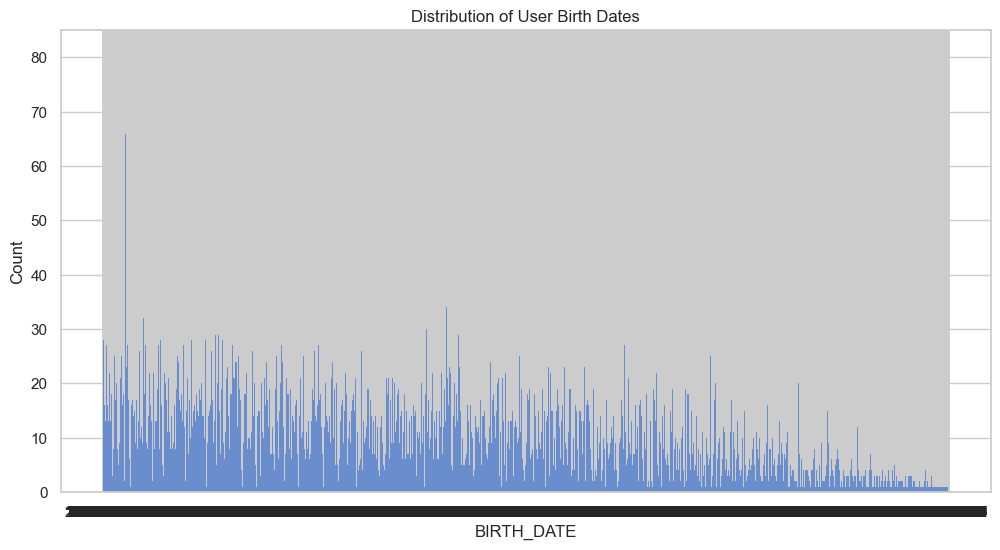

C:\Users\TTKT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


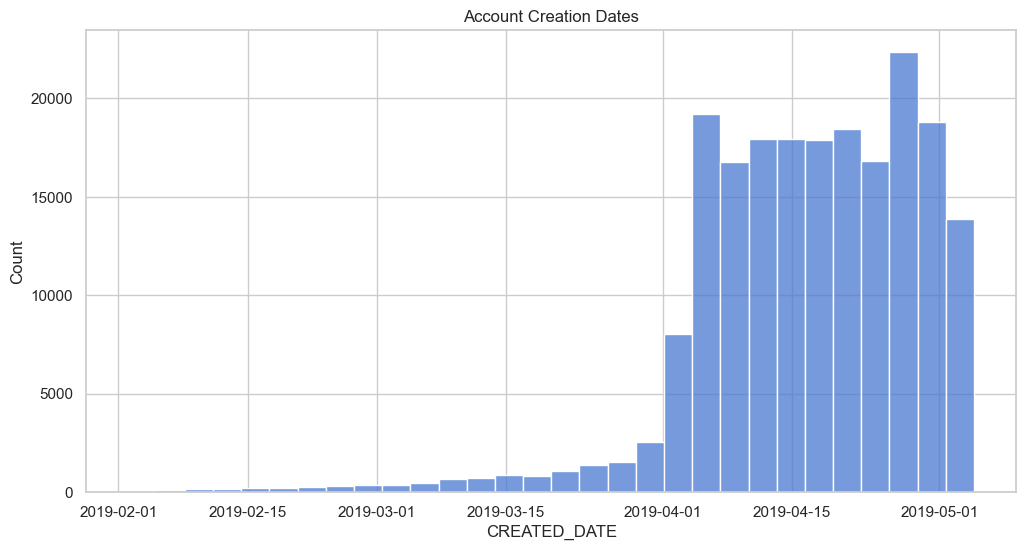

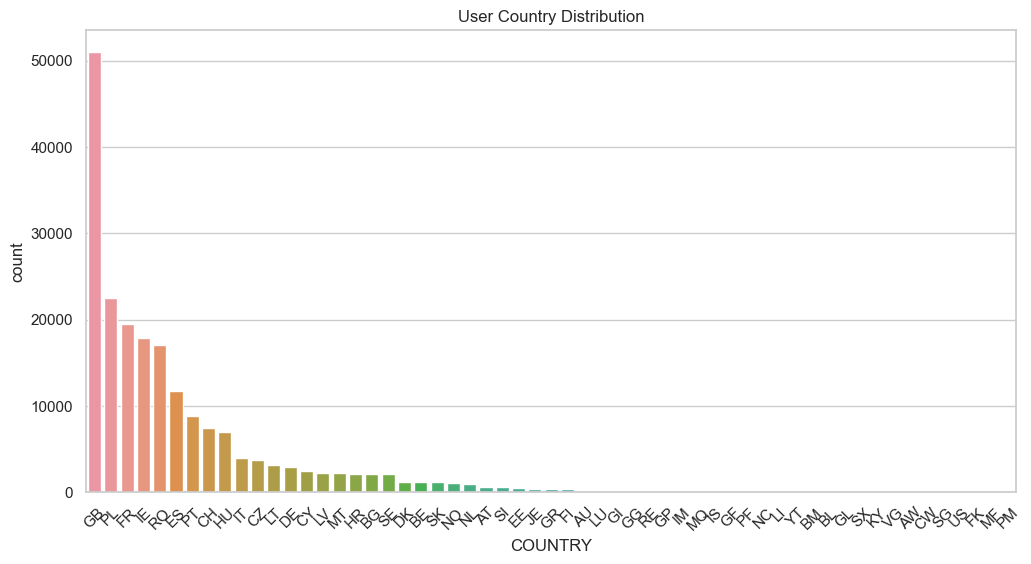

In [9]:
# Users Dataset EDA
print("\nUSERS DATA EDA")
sns.histplot(users['BIRTH_DATE'], bins=30, kde=False)
plt.title("Distribution of User Birth Dates")
plt.show()

sns.histplot(pd.to_datetime(users['CREATED_DATE']), bins=30, kde=False)
plt.title("Account Creation Dates")
plt.show()

sns.countplot(x='COUNTRY', data=users, order=users['COUNTRY'].value_counts().index)
plt.title("User Country Distribution")
plt.xticks(rotation=45)
plt.show()


TRANSACTIONS DATA EDA


C:\Users\TTKT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


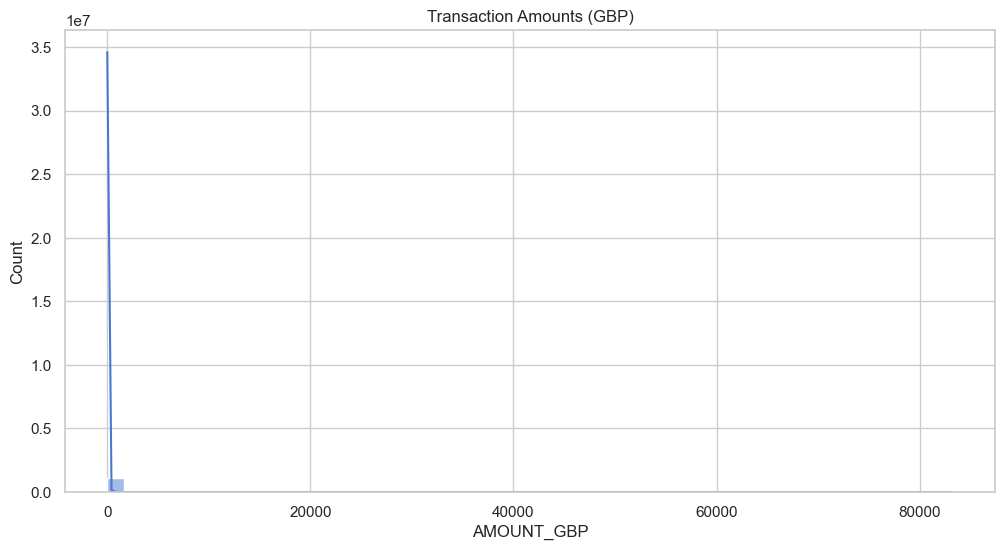

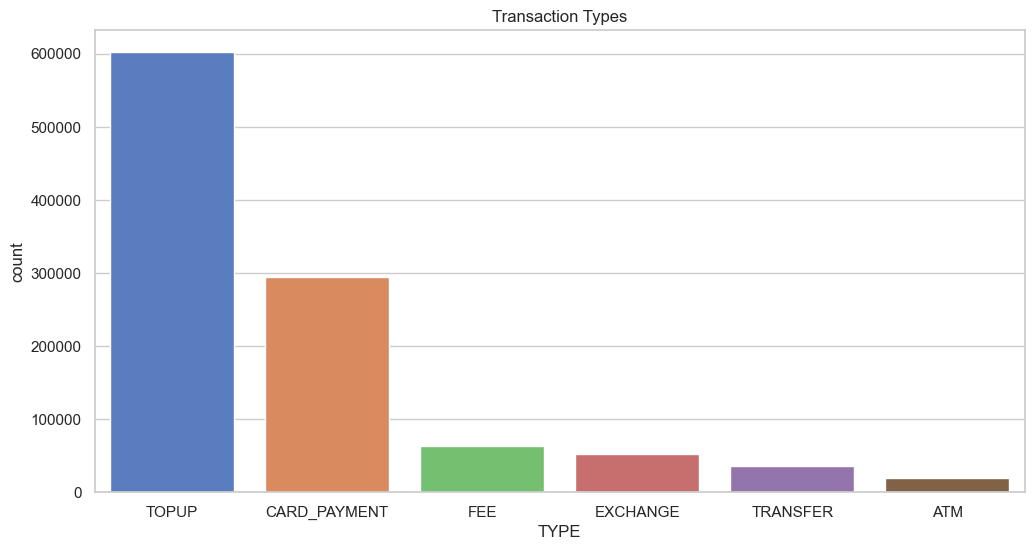

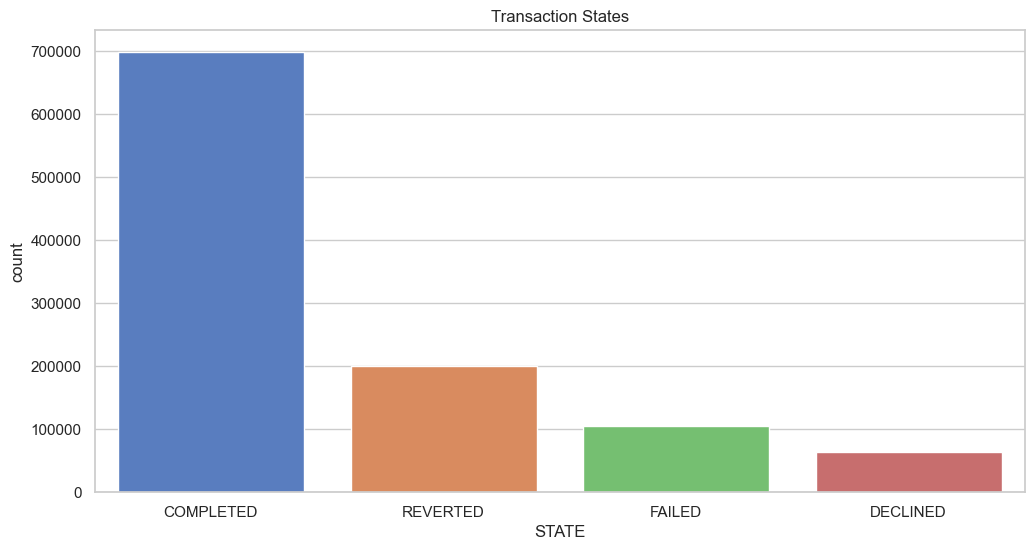

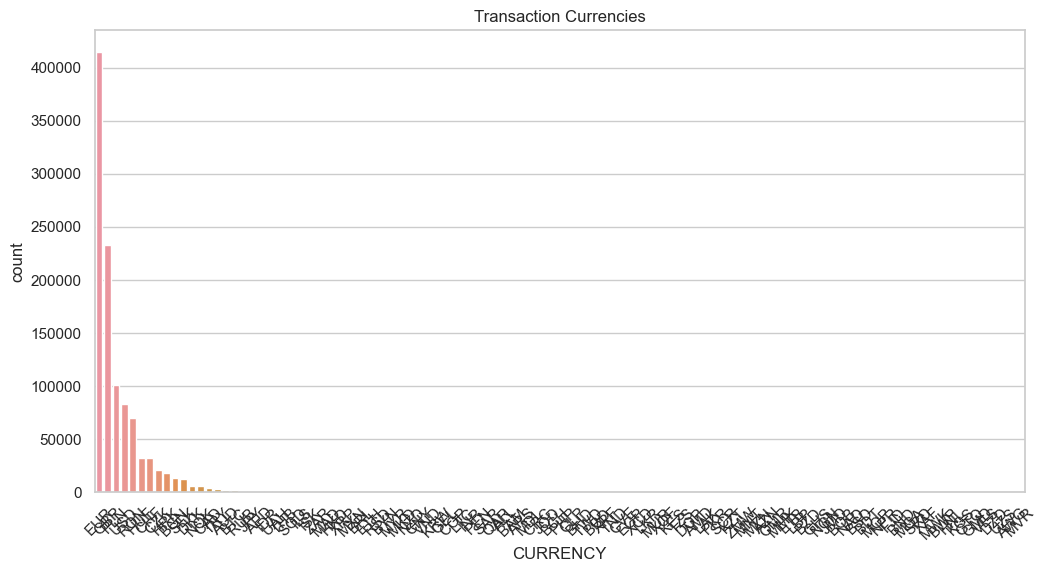

KeyError: 'DATE'

In [10]:
# Transactions Dataset EDA
print("\nTRANSACTIONS DATA EDA")
sns.histplot(transactions['AMOUNT_GBP'], bins=50, kde=True)
plt.title("Transaction Amounts (GBP)")
plt.show()

sns.countplot(x='TYPE', data=transactions, order=transactions['TYPE'].value_counts().index)
plt.title("Transaction Types")
plt.show()

sns.countplot(x='STATE', data=transactions, order=transactions['STATE'].value_counts().index)
plt.title("Transaction States")
plt.show()

sns.countplot(x='CURRENCY', data=transactions, order=transactions['CURRENCY'].value_counts().index)
plt.title("Transaction Currencies")
plt.xticks(rotation=45)
plt.show()

transactions['DATE'] = pd.to_datetime(transactions['DATE'], errors='coerce')
transactions['DATE'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title("Transaction Volume Over Time (Monthly)")
plt.ylabel("Number of Transactions")
plt.show()


FRAUDSTERS DATA EDA
Number of Fraudulent Users: 757


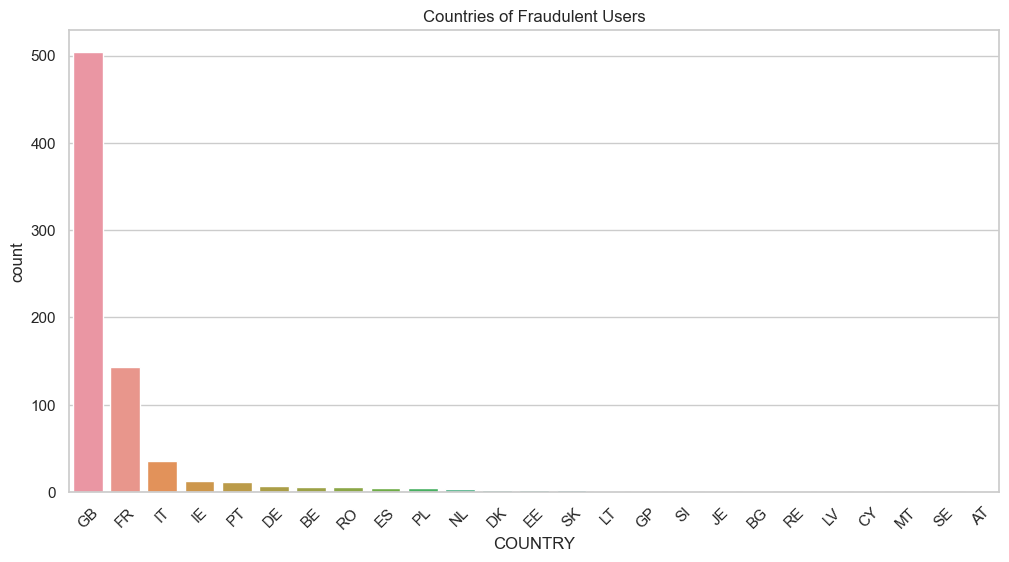

C:\Users\TTKT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


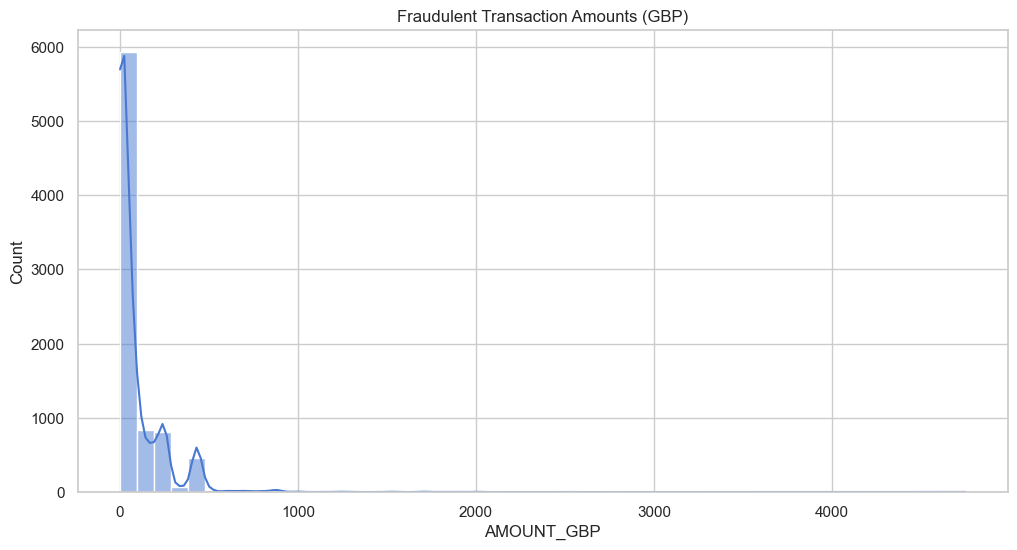

In [13]:
# Fraudsters Dataset EDA
print("\nFRAUDSTERS DATA EDA")
print(f"Number of Fraudulent Users: {fraudsters['USER_ID'].nunique()}")
fraud_user_set = set(fraudsters['USER_ID'])
fraud_users = users[users['ID'].isin(fraud_user_set)]
fraud_txns = transactions[transactions['USER_ID'].isin(fraud_user_set)]

sns.countplot(x='COUNTRY', data=fraud_users, order=fraud_users['COUNTRY'].value_counts().index)
plt.title("Countries of Fraudulent Users")
plt.xticks(rotation=45)
plt.show()

sns.histplot(fraud_txns['AMOUNT_GBP'], bins=50, kde=True)
plt.title("Fraudulent Transaction Amounts (GBP)")
plt.show()

In [15]:
features = transactions.groupby('USER_ID').agg(
    trans_count=('ID', 'count'),
    total_amount=('AMOUNT_GBP', 'sum'),
    avg_amount=('AMOUNT_GBP', 'mean'),
    failed_count=('STATE', lambda x: (x == 'FAILED').sum()),
    currency_count=('CURRENCY', pd.Series.nunique)
).reset_index()
features['fail_rate'] = features['failed_count'] / features['trans_count']

features = pd.merge(features, users, left_on='USER_ID', right_on='ID', how='left')
features['is_fraud'] = features['USER_ID'].isin(fraud_user_set).astype(int)

features['CREATED_DATE'] = pd.to_datetime(features['CREATED_DATE'], errors='coerce')
features['account_age_days'] = (datetime(2025,5,15) - features['CREATED_DATE']).dt.days
features['BIRTH_DATE'] = pd.to_datetime(features['BIRTH_DATE'], errors='coerce')
features['user_age'] = ((datetime(2025,5,15) - features['BIRTH_DATE']).dt.days / 365).astype(int)

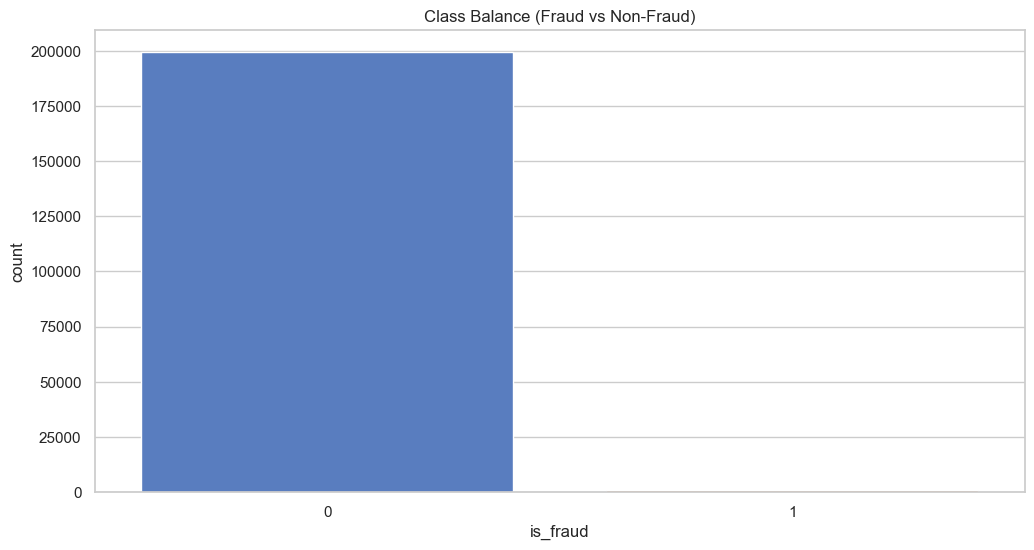

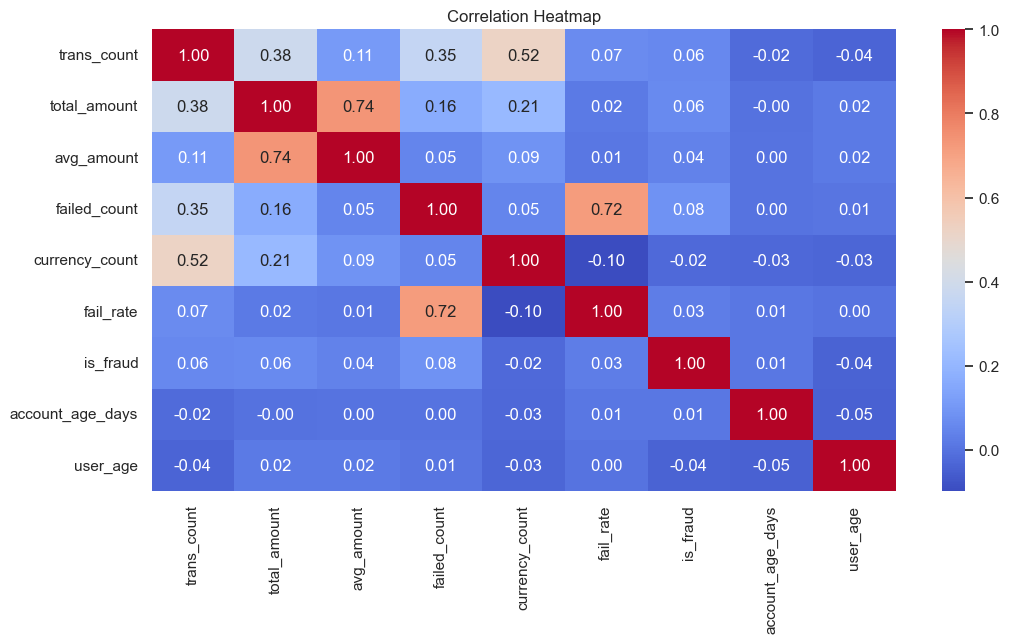

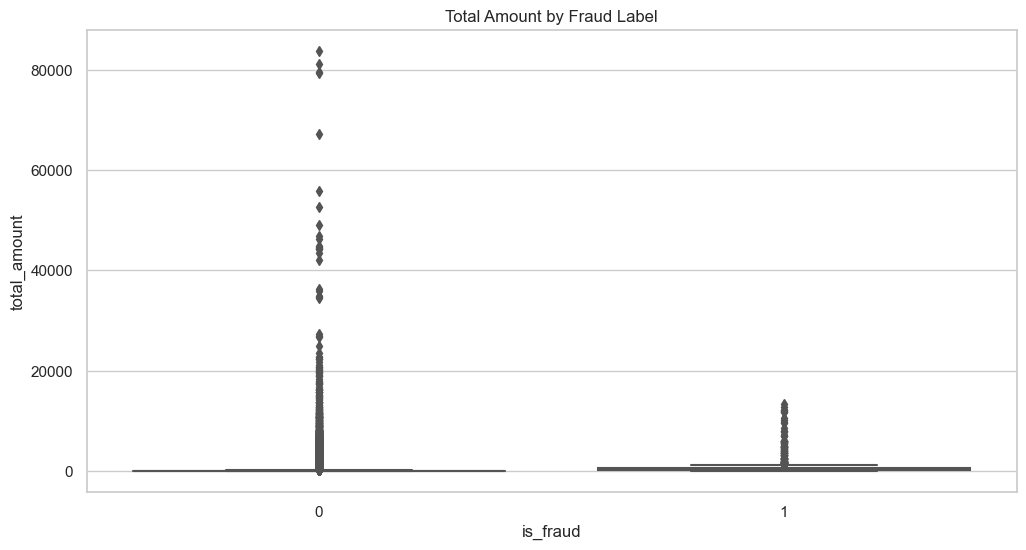

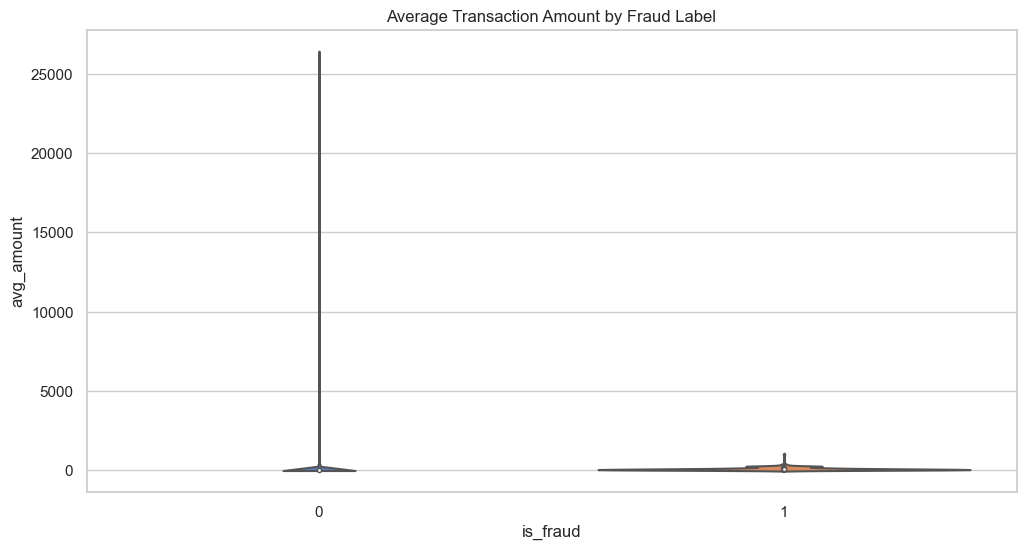

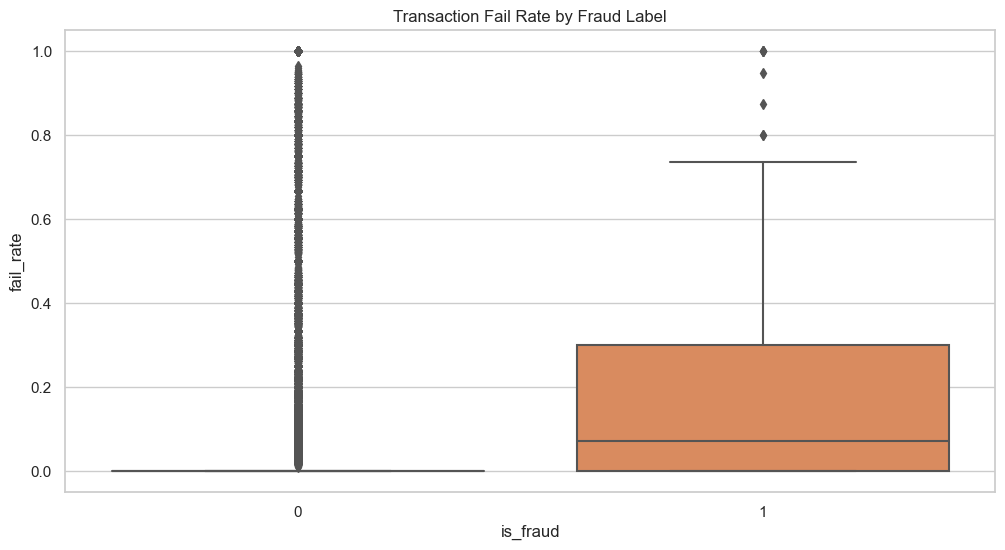

In [16]:
# Combined Dataset EDA
sns.countplot(x='is_fraud', data=features)
plt.title("Class Balance (Fraud vs Non-Fraud)")
plt.show()

corr = features.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.boxplot(x='is_fraud', y='total_amount', data=features)
plt.title("Total Amount by Fraud Label")
plt.show()

sns.violinplot(x='is_fraud', y='avg_amount', data=features)
plt.title("Average Transaction Amount by Fraud Label")
plt.show()

sns.boxplot(x='is_fraud', y='fail_rate', data=features)
plt.title("Transaction Fail Rate by Fraud Label")
plt.show()

In [20]:
# Method 1: IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_amount = detect_outliers_iqr(transactions, 'AMOUNT_GBP') 
print(f"Number of outliers in 'AMOUNT_GBP': {len(outliers_amount)}")
print(outliers_amount[['AMOUNT_GBP']])

# Method 2: Z-score method
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = stats.zscore(df[column].dropna())
    abs_z_scores = np.abs(z_scores)
    outlier_mask = abs_z_scores > threshold
    outliers = df.loc[df[column].notnull(), :][outlier_mask]
    return outliers

outliers_z = detect_outliers_zscore(transactions, 'AMOUNT_GBP')
print(f"Number of outliers (Z-score) in 'AMOUNT_GBP': {len(outliers_z)}")
print(outliers_z[['AMOUNT_GBP']])


Number of outliers in 'AMOUNT_GBP': 163201
         AMOUNT_GBP
5           2100.00
9             94.88
16           197.06
22           100.00
36           125.00
...             ...
1068334       83.62
1068338       88.96
1068345       88.63
1068352       61.08
1068358      120.41

[163201 rows x 1 columns]
Number of outliers (Z-score) in 'AMOUNT_GBP': 3930
         AMOUNT_GBP
5           2100.00
273         2693.78
451         2009.69
484         1000.00
915          970.51
...             ...
1066995     1000.00
1067503     1411.27
1067741     1400.35
1068043      896.27
1068146      952.68

[3930 rows x 1 columns]


The code above analyzes Revolut's real datasets—users.csv, transactions.csv, and fraudsters.csv—to find fraud-related patterns.

Each dataset is examined thoroughly, showing its structure, missing values, and key statistics. Graphs like histograms and count plots display user birth dates, account creation dates, transaction amounts, types, statuses, currencies, and transaction trends over time. These charts help reveal unusual patterns, such as spikes in high-value transactions or imbalances in transaction categories. 

Fraudulent users and their transactions are identified and visualized separately to compare their activity with typical users. This helps find fraud indicators like unusually high spending or location-based transaction trends.

Next, the engineered features includes transaction counts, total and average amounts, failed transactions, and user details like account and age information. Fraud detection is further improved by analyzing the fraud-to-non-fraud ratio and checking how different features relate through connection charts and comparison graphs.

Finally, two standard methods for spotting unusual transactions are used: one that checks extreme values based on their range (IQR method) and another that finds statistically rare values (Z-score method). These help flag transactions with suspiciously high amounts that might indicate fraud.